страница 37, задание 5

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

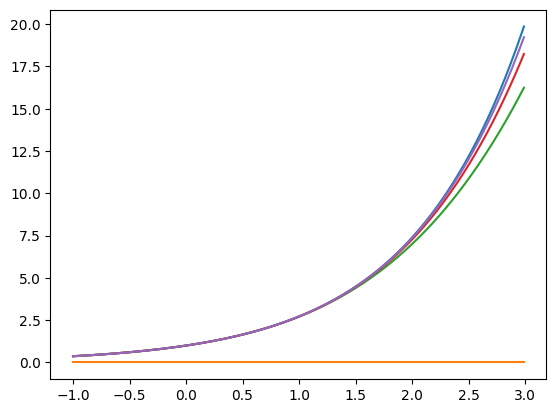

In [3]:
arr = []
arr_e = []
summ = 0
x = np.arange(-1, 3, 0.01)
for i in x:
    summ = 0
    for k in range(10):
        summ += (i ** k / math.factorial(k))
    arr.append(summ)
plt.plot(x, arr)

for i in [0, 5, 6, 7]:
    arr = []
    for j in x:
        summ = 0
        for k in range(i):
            summ += (j ** k / math.factorial(k))
        arr.append(summ)
    plt.plot(x, arr)
plt.show()

страница 58, задания 8.1 

In [4]:
from scipy.integrate import nquad
from scipy.integrate import quad

In [5]:
def f(x):
    return np.exp(-x ** 2)


I = quad(f, 0, np.inf)
print(I)

(0.8862269254527579, 7.101318378329813e-09)


In [6]:
def f(x, y, z):
    return (x + y + z) / np.sqrt(2 * (x ** 2) + 4 * (y ** 2) + 5 * (z ** 2))


def zbounds(x, y):
    return [0, np.sqrt(1 - x ** 2 - y ** 2)]


def ybounds(x):
    return [0, np.sqrt(1 - x)]


def xbounds():
    return [0, 1]


I = nquad(lambda z, y, x: f(x, y, z), [zbounds, ybounds, xbounds])
print(I)
# print(12 / np.math.factorial(8))  # точное значение

(0.3890502749167828, 1.4872342100983585e-08)


(2.0, 2.220446049250313e-14)


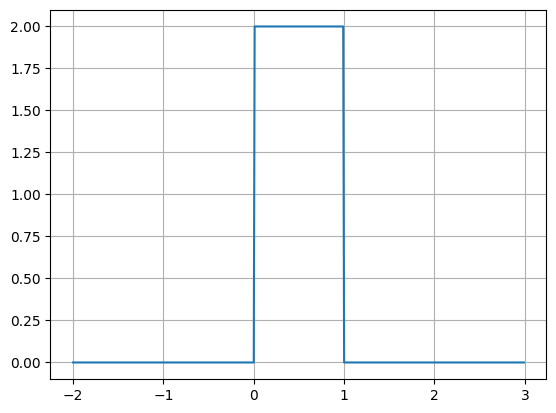

In [7]:
def f(x, A=2):
    if 0 < x and x < 1:
        return A
    else:
        return 0


I = quad(lambda x: f(x), 0, 1)
print(I)
x = [-2 + n / 100 for n in range(500)]
# print((np.arange(-2, 3, 0.01)))
y = [f(t) for t in x]
# print(x)
# print(y)
plt.plot(x, y)
plt.grid(True)
plt.show()

Лаб 2

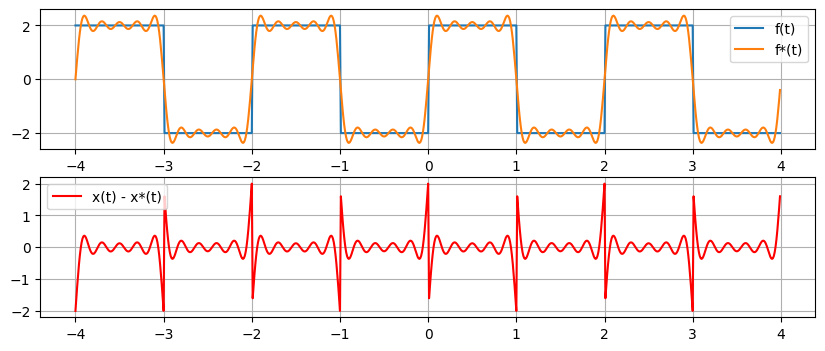

In [10]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


def signal(t):
    return 2 if 0 <= t % 2 < 1 else -2


def f2_star(t, func=signal, period=2, start=-4, N=10):
    w = 2 * math.pi / period
    a0 = 2 / period * (quad(lambda x: func(x), start, start + period))[0]
    summ = a0 / 2
    for k in range(N + 1):
        an = 2 / period * \
             (quad(lambda x: func(x) * np.cos(k * w * x), start, start + period))[0]
        bn = 2 / period * \
             (quad(lambda x: func(x) * np.sin(k * w * x), start, start + period))[0]
        summ += an * np.cos(k * w * x) + bn * np.sin(k * w * x)
    return summ


# x = [-4 + n / 100 for n in range(801)]
x = np.arange(-4, 4, 0.01)

y = np.array([signal(t) for t in x])
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(x, y, label='f(t)')

# y_star = np.array([f2_star(t) for t in x])
y_star = np.array(f2_star(x))
plt.plot(x, y_star, label='f*(t)')
plt.grid(True)
plt.legend()
# погрешность приближения
error = y_star - y
plt.subplot(2, 1, 2)
plt.plot(x, error, label='x(t) - x*(t)', color='red')

plt.grid(True)
plt.legend()
plt.show()

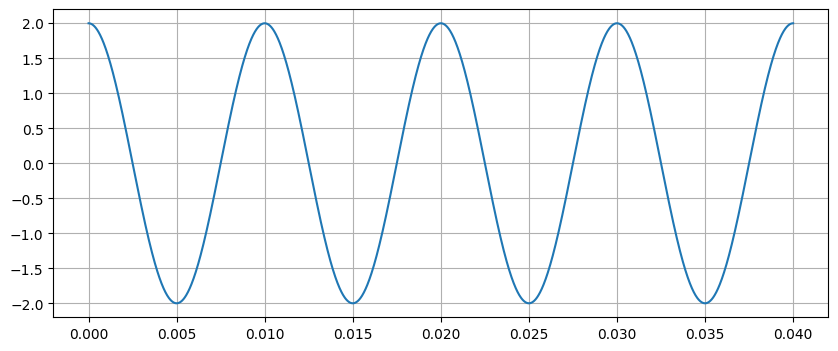

In [11]:
def f_cos(x, freq=100, amplitude=2):
    w = 2 * np.pi * freq
    return amplitude * np.cos(w * x)


x = np.linspace(0, 0.04, 2000)
# y = np.array([f2_star(t, f_cos) for t in x])
y = f_cos(x)
plt.figure(figsize=(10, 4))

plt.plot(x, y)
plt.grid(True)
plt.show()

# fcos = np.fft.fft(f_cos)
# freq =  np.fft.fftfreq(x.size, x[1] - x[0])
# plt.plot(freq[:len(freq)//2], 2.0/len(freq) * np.abs(fcos[0:len(freq)//2]))

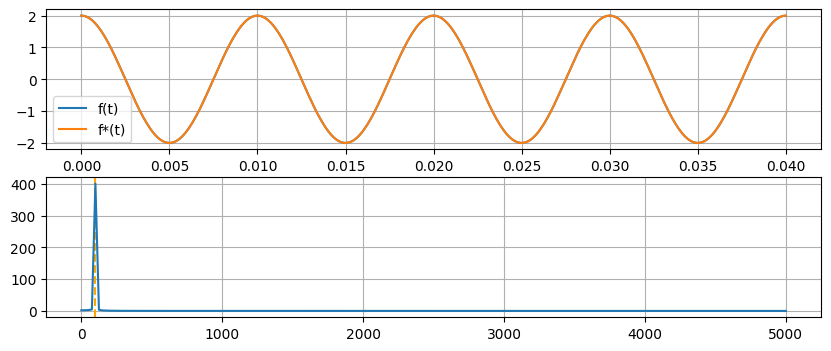

In [12]:
from scipy.fftpack import fft

# x = np.arange(-4, 4, 0.01)
x = np.linspace(0, 0.04, 400)
# y = np.array([f(t) for t in x])
y = f_cos(x)
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(x, y, label='f(t)')

y_star = np.array(f2_star(x, f_cos, start=0, period=0.01))
plt.plot(x, y_star, label='f*(t)')
plt.grid(True)
plt.legend()

# error = y_star - y
# plt.subplot(2, 1, 2)
# plt.plot(x, error, label='x(t) - x*(t)', color='red')

y_fft = np.fft.rfft(y)  # б) В качестве преобразования Фурье можно использовать функцию дискретного преобразования Фурье встроенную в Python (numpy.fft)
x_freq = np.fft.rfftfreq(400, 0.0001)
magnitude = np.abs(y_fft)
an = np.abs(100)
plt.subplot(2, 1, 2)
plt.axvline(an, color='orange', linestyle='--')
plt.plot(x_freq, magnitude)
plt.grid(True)
plt.show()

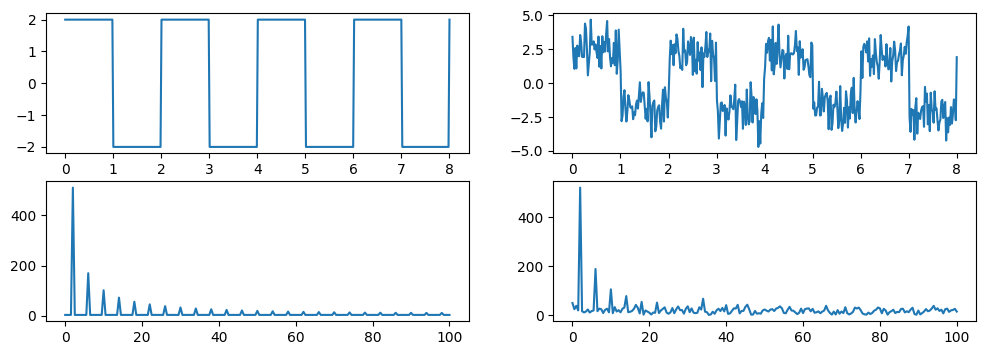

In [26]:
x = np.linspace(0, 8, 400)
y = np.array([signal(t) for t in x])

y_fft = np.fft.rfft(y)
x_freq = np.fft.rfftfreq(400, 0.005)
magnitude = np.abs(y_fft)

y_noise = 1 * np.random.randn(400)
noised = y + y_noise
noised_fft = np.fft.rfft(noised)
noised_magnitude = np.abs(noised_fft)

_, ax = plt.subplots(2, 2, figsize=(12, 4))
ax[0][0].plot(x, y, label='без шума')
ax[1][0].plot(x_freq, magnitude)
ax[0][1].plot(x, noised, label='шум')
ax[1][1].plot(x_freq, noised_magnitude)
# plt.legend()
plt.show()